In [1]:
import numpy as np

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.regression_generator import generate_regression
from HW2.sgd import scaled_mini
from HW2.visualization import visualize_regression_point, visualize_line, draw_levels

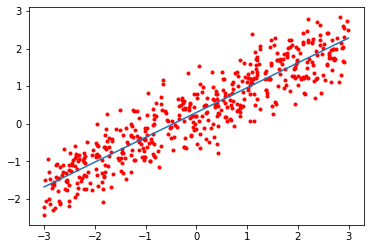

In [2]:
f, points = generate_regression(point_count=500, scale=np.array([3, 0.5]))

visualize_regression_point(f, points, scale=3)

In [3]:
storage = BenchmarkStorage()

# No scale (==1)

[0.40104474 0.20135218]
Benchmark results for config <('mini50-scale1', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.139691
Mean memory:0.0B
Mean SMAPE value:0.21077826440775474
Mean RMSE value:0.29288785199607126
Mean logcosh value:0.04139026840145873
Mean gradient calls:2500.0
Iterations done:50.0


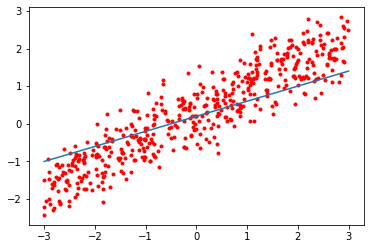

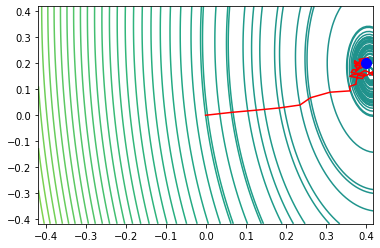

In [4]:
index = storage.add_benchmark_config(batch_size='mini50-scale1')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=5e-2, scale=1)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(ab, ps)
draw_levels(ps, meta["points"])

# Scale (0.5 $\rightarrow$ 100)

[0.92857735 0.22656847]
Benchmark results for config <('mini50-scale100', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.118574
Mean memory:0.0B
Mean SMAPE value:0.03656699263507278
Mean RMSE value:7.447001463021958
Mean logcosh value:5.5888718595662406
Mean gradient calls:2650.0
Iterations done:53.0


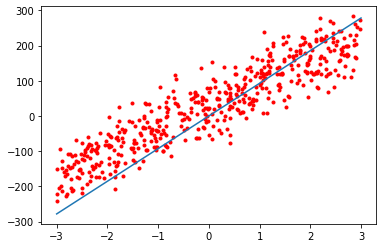

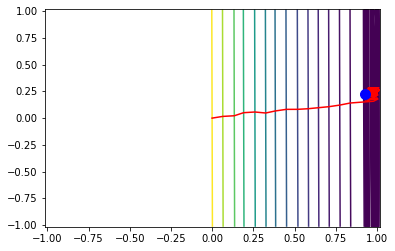

In [9]:
index = storage.add_benchmark_config(batch_size='mini50-scale100')
(ab, meta), ps = scaled_mini(points, batch_size=50, scale=100, eps=1e-1)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(np.array([ab[0] * 100, ab[1]]), ps)
draw_levels(ps, meta["points"])

#### Наблюдения
* Если изначальный разброс маленький, то градиент очень маленький и нам нехватает точности, чтобы прийти в минимум
* Для этого мы уыеличиваем `scale`, чтобы не "перескакивать" минимум
* Чтобы прийти в одну и ту же точку потребуется больше итераций

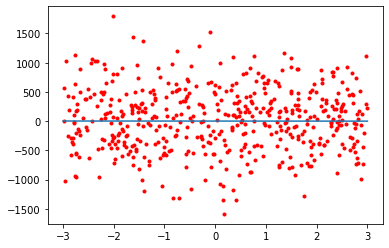

In [10]:
f, points = generate_regression(point_count=500, scale=np.array([3, 500]))

visualize_regression_point(f, points, scale=3)

# Scale (500 $\rightarrow$ 0.01)

[0.0506172 0.1213613]
Benchmark results for config <('mini25-scale0.01', 1, Default(no) optimization, Squared error calculator)>:
Mean time:0.11352
Mean memory:0.0B
Mean SMAPE value:0.8715017979099946
Mean RMSE value:5.092126943892362
Mean logcosh value:3.433957069016858
Mean gradient calls:2800.0
Iterations done:56.0


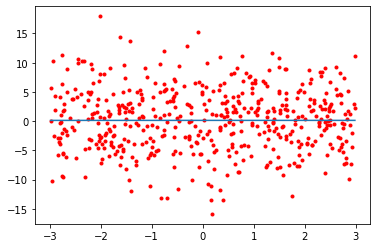

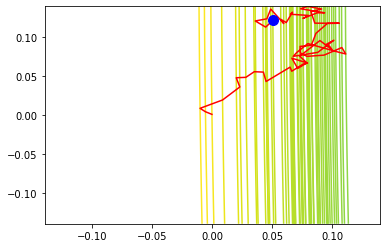

In [20]:
index = storage.add_benchmark_config(batch_size='mini25-scale0.01')
(ab, meta), ps = scaled_mini(points, batch_size=50, eps=2e-2, scale=0.01)
storage.add_benchmark_result(index, meta)

print(ab)
print(storage.get_benchmark_results(index))

visualize_line(np.array([ab[0] * 0.01, ab[1]]), ps)
draw_levels(ps, meta["points"])

#### Наблюдения

* Если разброс слишком большой, то для того, чтобы прийти в минимум, нам может не хватить нашего градиента т.к. минимум находится где-то "далеко"
* Для этого мы уменьшаем `scale` и делаем более "широкие" (в изначальном смысле) шаги
* Соответственно, чтобы прийти в одну и ту же точку, потребуется меньше итераций